# 5.0 Recommendation
For the recommendation part, the prediction from the sentimental analysis is used plus two more questions to release a recommendation. One of the questions is the preference of the user for a movie or a song. The second question is users month of birth. With that information, a prediction is created the possible outcomes as recommendations are chocolate, ice cream and cake. The dataset has 50 rows with different inputs acording with users decision. 

In this particular case two model are used for getting the recommendation. One of them is DecisionTreeClassifier and the other one is MultinomialNB (Naive Bayes). To use those models, some packages need to be imported from sklearn library. Due to our dataset has text, LabelEncoder is necessary to apply for converting text into numerical variables adecuatedly to their category.

At the end of the process, a comparison between both models is made to test which one is more precise to our dataset. Accuracy and loss performed in training and testing set will determine which method perform better. After the model is ready, it is saved to be used in the streamlit.py document to be deployed.

Table of content is as follow:
   #### 5.1 Importing Packages and Libraries
   #### 5.2 Exploring the Dataset
   #### 5.3 Preprocessing
   #### 5.4 Training and Prediction
   #### 5.5 Accuracy and Loss
   

# 5.1 Importing Packages and Libraries

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn import tree
import pickle

# 5.2 Exploring the Dataset

In [9]:
data= pd.read_csv('recommendation.txt', sep='\t', index_col='Index')

data.head()

,Emotion,Preference,Month,Prediction
Index,,,,
1,Happy,Movie,1,Ice cream
2,Sad,Song,3,Chocolate
3,Angry,Movie,5,Chocolate
4,Fear,Song,9,Cake
5,Disgust,Movie,10,Cake


# 5.3 Preprocessing
Columns in the dataset contains strings. Then, before inputing the data in the model, it is necesary to change everything to floats, which is what LabelEncoder does. However, only those columns with strings will be inputed to be converted in floats.

In [10]:
#Saving LabelEncoder in le for simplicity
le=LabelEncoder()

In [11]:
#The strings are reemplaced with numbers and save the in the same Dataframe
data['Emotion'] = le.fit_transform(data['Emotion'])
data['Preference'] = le.fit_transform(data['Preference'])
data['Prediction'] = le.fit_transform(data['Prediction'])
data.head()

,Emotion,Preference,Month,Prediction
Index,,,,
1,3,0,1,2
2,4,1,3,1
3,0,0,5,1
4,2,1,9,0
5,1,0,10,0


# 5.4 Training and Prediction
After having the data cleaned, it is ready for being inputed in the models. First, the data is divided in target and rest of the data. The models used are MultinomialNB and DecisionTreeClassifier because the dataset is small. In other case, more powerful model should be used.

In [12]:
#Separtion between target and data
y=data['Prediction']
X=data.drop(columns='Prediction')

In [13]:
#Instanciating MultinomialNB and DecisionTreeClassifier models
naive = MultinomialNB()
clf = DecisionTreeClassifier(criterion = 'entropy')

In [14]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.20)

In [15]:
#Training the Decision Tree Classifier and Multinomial Naive Bayes
naive.fit(X_train, y_train)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

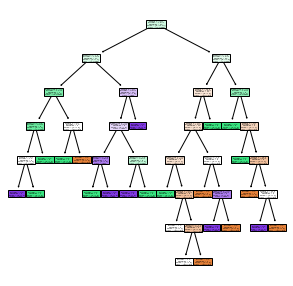

In [16]:
#Plotting the Decision Tree
features = ['Emotion', 'Preference', 'Month', 'Prediction']
classes = ['Chocolate', 'Ice cream', 'Cake']
fig = plt.figure(figsize=(5,5))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=classes,
                   filled=True)

In [17]:
#A description of how the Decision Tree is performed
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 5.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_2 <= 4.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_2 >  4.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_2 <= 2.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  2.00
|   |   |   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- feature_2 <= 4.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.50
|   |   |   |--- class: 2
|--- feature_2 >  5.50
|   |--- fea

In [18]:
#Predicting labels on the test set.
y_pred_naive = naive.predict(X_test)
y_pred =  clf.predict(X_test)

# 5.5 Accuracy and Loss

In [19]:
#Printing accuracy and loss for each model for comparison
print('Accuracy Score on train data for naive: ', accuracy_score(y_true=y_train, y_pred=naive.predict(X_train)))
print('Accuracy Score on test data for naive: ', accuracy_score(y_true=y_test, y_pred=y_pred_naive))
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data for naive:  0.4
Accuracy Score on test data for naive:  0.2
Accuracy Score on train data:  0.95
Accuracy Score on test data:  0.5


# 5.6 Saving the Model

In [21]:
#For saving the model
filename = "Decision_tree_model.sav"
pickle.dump(clf, open(filename, 'wb'))